# SDFEC Simulation Example

In [18]:
import numpy as np
import matplotlib.pyplot as plt

import sdfec_client

%matplotlib inline

In [39]:
target = "http://localhost:8230/api"

client = sdfec_client.SDFECClient(target)

In [40]:
code = sdfec_client.parse_yaml("test.sdfec.yml")
code_id = client.add_code(code)

In [41]:
# client.status

In [42]:
SNR = -20*np.log10(0.5)

In [43]:
SNR

6.020599913279624

In [50]:
snrs = np.arange(3, 7.25, 0.25)
# snrs = np.array([SNR])
snr_scales = np.ones_like(snrs)*1

In [51]:
result = client.simulate(code_id, snrs, snr_scales=snr_scales, term_time=10, max_iterations=16, collect_last_failed=1024).wait_progress()

FloatProgress(value=0.0, bar_style='info', description='Running: ', max=1.0)

In [52]:
[len(v) for v in result["last_failed"][-1]]

[6, 8, 7, 9, 6, 14]

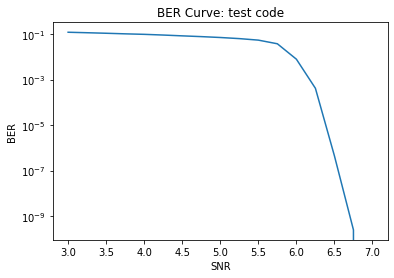

In [53]:
plt.plot(result["snrs"], result["bers"])
plt.yscale("log")
plt.title("BER Curve: test code")
plt.ylabel("BER")
plt.xlabel("SNR")
plt.show()